<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Sentiment-Analysis-in-NLP/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets_df = pd.read_csv("/content/drive/MyDrive/Twitter Tweets Data/twitter.csv")

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


0 label = positive
1 label = negative

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets_df = tweets_df.drop(['id'], axis = 1)

## Data Exploration

In [6]:
tweets_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

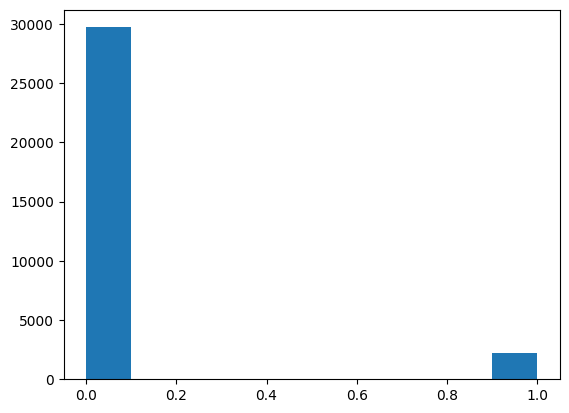

In [7]:
plt.hist(tweets_df.label)

In [8]:
tweets_df['length'] = tweets_df.tweet.apply(len)

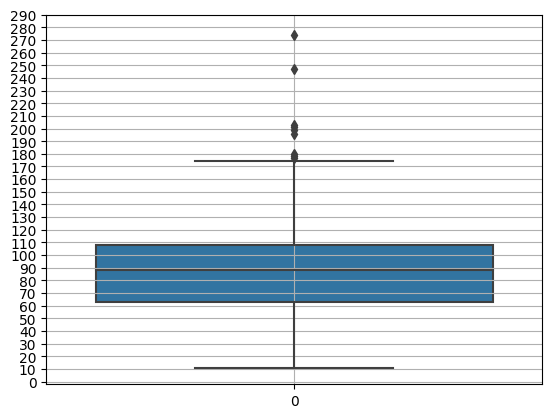

In [9]:
sns.boxplot(tweets_df['length'])
plt.yticks(range(0, 300, 10))
plt.grid(True)

In [10]:
tweets_df.length.describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [11]:
tweets_df[tweets_df['length']==11]['tweet']

25195    i love you 
Name: tweet, dtype: object

## WordCloud

In [12]:
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
positive = tweets_df[tweets_df['label']==0]
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [14]:
positive_text = " ".join(positive['tweet'].tolist())

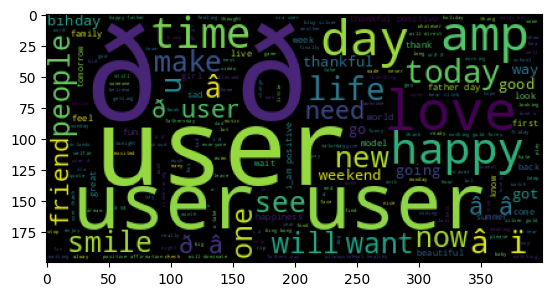

In [15]:
from wordcloud import WordCloud

plt.imshow(WordCloud().generate(positive_text))

In [16]:
negative = tweets_df[tweets_df['label']==1]
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


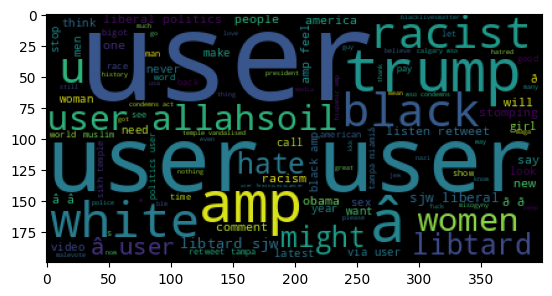

In [17]:
negative_text = " ".join(negative['tweet'].tolist())
plt.imshow(WordCloud().generate(negative_text))

## Pipelining data cleaning and vectorization

In [18]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def message_cleaning(message):
  text_punc_removed = [char for char in message if char not in string.punctuation]
  text_punc_removed = ''.join(text_punc_removed)
  text_cleaned = [word for word in text_punc_removed.split() if word.lower() not in stopwords_english]
  return text_cleaned

In [20]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [21]:
tweets_df_clean[5]

['22',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# dtype is necessary as the ram required otherwise is very high
cv = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_count_vector = cv.fit_transform(tweets_df['tweet'])

In [23]:
cv.get_feature_names_out()[1500:1550]

array(['abasel2016â\x80¦', 'abba', 'abbey', 'abbibuckets', 'abbie',
       'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abc',
       'abc2020', 'abc7chicago', 'abcdiscovers', 'abd', 'abdominal',
       'abducted', 'abe', 'abeed', 'abella', 'abenomics', 'aberdeen',
       'aberrant', 'aberystwyth', 'abetting', 'abg', 'abglp2016', 'abhi',
       'abhishek', 'abi', 'abi16', 'abiding', 'abilities', 'ability',
       'abitur', 'abitur2016', 'abject', 'abk', 'able', 'ableg',
       'ableism', 'ableismâ\x80¦', 'ablonde', 'abndp', 'aboedâ\x80\x9d',
       'aboion', 'abomination', 'abomination2', 'aboutand', 'aboutbe'],
      dtype=object)

In [24]:
type(tweets_count_vector)

scipy.sparse._csr.csr_matrix

In [25]:
X = pd.DataFrame(tweets_count_vector.toarray(), columns = cv.get_feature_names_out())

In [26]:
X.head()

,0,0000001,00027,001,0035,00h30,01,0115,0161,019,...,ó¾­ó¾­»,ó¾­©,ó¾®ó¾¢ó¾,ó¾®ó¾µó¾­»,ó¾®ó¾°,ó¾®ó¾®,ó¾®ð¾ó¾­»,ó¾°,ó¾°ó¾ó¾ó¾¤ó¾®ó¾ºó¾®ó¾ó¾ó¾,ó¾°ó¾°ó¾°
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X.columns[1500:1550]

Index(['abasel2016â¦', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbotabad',
       'abbott', 'abbu', 'abby', 'abbyybelle', 'abc', 'abc2020', 'abc7chicago',
       'abcdiscovers', 'abd', 'abdominal', 'abducted', 'abe', 'abeed',
       'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth',
       'abetting', 'abg', 'abglp2016', 'abhi', 'abhishek', 'abi', 'abi16',
       'abiding', 'abilities', 'ability', 'abitur', 'abitur2016', 'abject',
       'abk', 'able', 'ableg', 'ableism', 'ableismâ¦', 'ablonde', 'abndp',
       'aboedâ', 'aboion', 'abomination', 'abomination2', 'aboutand',
       'aboutbe'],
      dtype='object')

In [28]:
Y = tweets_df['label']

## Training and Evaluating Naive Bayes Classifier Model

In [29]:
X.shape

(31962, 47386)

In [30]:
Y.shape

(31962,)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
y_predicted = NB_classifier.predict(x_test)

In [39]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[5760,  181],
       [ 208,  244]])

In [37]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5941
           1       0.57      0.54      0.56       452

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

